## Step 1: Reading the data

1. Go to https://www.kaggle.com/c/titanic/data
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
3. Download the train.csv file into this project
4. Create an iPython notebook and load the csv into pandas.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 2: Cleaning the data

1. Create a bar chart showing how many missing values are in each column
2. Which column has the most NaN values? How many cells in that column are empty?
3. Delete all rows where Embarked is empty
4. Fill all empty cabins with ¯\(ツ)/¯

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic.loc[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
miss_data = titanic[['Age', 'Cabin', 'Embarked']].isnull().sum()

In [19]:
miss_data
# There are 177 on Age, 687 on Cabin, and 2 on Embarked of missing data.

Age         177
Cabin       687
Embarked      2
dtype: int64

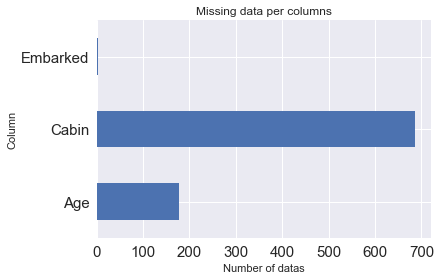

In [20]:
#Create a bar chart showing how many missing values are in each column
miss_graph = miss_data.plot(kind='barh', fontsize=15)
miss_graph.set_title('Missing data per columns')
miss_graph.set_xlabel('Number of datas')
miss_graph.set_ylabel('Column')


In [21]:
#Which column has the most NaN values? How many cells in that column are empty?
# Most NaN is Cabin and 687 empty

In [22]:
# Delete all rows where Embarked is empty
titanic['Embarked'].dropna(inplace=True)

In [23]:
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [24]:
# Fill all empty cabins with ¯\(ツ)/¯
titanic['Cabin'].fillna('¯\(ツ)/¯' , inplace=True)

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 3: Feature extraction

1. There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
* Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
* Do the same thing for Sex

In [26]:
#There are two columns that pertain to how many family members are on the boat for a given person. 
#Create a new column called FamilyCount which will be the sum of those two columns.
titanic["FamilyCount"]=titanic["SibSp"] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [27]:
# Reverends have a special title in their name. 
# Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
# there is a way this by list comprehension and lambda
titanic['IsReverend'] = titanic["Name"].str.contains('Rev')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,False


In [28]:
int(True)

1

In [29]:
titanic['IsReverend'] = titanic['IsReverend'].astype(int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [30]:

# In order to feed our training data into a classification algorithm, 
# we need to convert our categories into 1's and 0's using pd.get_dummies
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
# These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
# Do the same thing for Sex
# #BONUS: Extract the title from everyone's name and create dummy columns
new_titanic =pd.get_dummies(titanic, columns=["Embarked","Sex"])
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1


In [31]:
def get_title(name):
    if '.' in name:
        return name.split(",")[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
new_titanic["title"]=new_titanic["Name"].map(lambda x: get_title(x))
pd.get_dummies(new_titanic, columns=["title"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,...,0,0,0,0,1,0,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,¯\(ツ)/¯,...,1,0,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis
* What was the survival rate overall?
* Which gender fared the worst? What was their survival rate?
* What was the survival rate for each Pclass?
* Did any reverends survive? How many?
* What is the survival rate for cabins marked ¯\(ツ)/¯
* What is the survival rate for people whose Age is empty?
* What is the survival rate for each port of embarkation?
* What is the survival rate for children (under 12) in each Pclass?
* Did the captain of the ship survive? Is he on the list?
* Of all the people that died, who had the most expensive ticket? How much did it cost?
* Does having family on the boat help or hurt your chances of survival?

In [32]:
#What was the survival rate overall?
new_titanic["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [33]:
survival_rate = 342/len(new_titanic)
survival_rate


0.3838383838383838

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [35]:
# Which gender fared the worst? What was their survival rate?
group_by_gender = titanic.groupby("Sex")
group_by_gender.mean()["Fare"]


Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [36]:
# The worst fared gender is male.

In [37]:
 #What was their survival rate?
group_by_gender.Survived.mean()['male']

0.18890814558058924

In [38]:
# Male survival rate is 18.9%

In [39]:
#What was the survival rate for each Pclass?
group_by_Pclass = titanic.groupby('Pclass')

In [40]:
group_by_Pclass.Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [41]:
# Here is survival rate by each class. 
# First class is 63%, Second class is 47%, and Third class is 24%

In [42]:
#Did any reverends survive? How many?
group_by_rev = titanic.groupby("IsReverend")

In [43]:
group_by_rev.tail(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,¯\(ツ)/¯,Q,0,1
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,0,0
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,¯\(ツ)/¯,S,0,0
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,¯\(ツ)/¯,S,0,0
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,¯\(ツ)/¯,C,0,0
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,¯\(ツ)/¯,C,0,0
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,¯\(ツ)/¯,S,0,0


In [44]:
group_by_rev.Survived.sum()

IsReverend
0    342
1      0
Name: Survived, dtype: int64

In [45]:
# No Reverends Survived. T.T

In [46]:
#What is the survival rate for cabins marked ¯\(ツ)/¯
titanic.loc[titanic["Cabin"]=="¯\(ツ)/¯"]["Survived"].sum()

206

In [47]:
# There are 206 people survivied from ¯\(ツ)/¯. 
sur_rate=206/len(titanic.loc[titanic["Cabin"]=="¯\(ツ)/¯"])
sur_rate

0.29985443959243085

In [48]:
titanic.loc[titanic["Cabin"]=="¯\(ツ)/¯"]["Survived"].mean()

0.29985443959243085

In [49]:
# Survivial rate of cabin = ¯\(ツ)/¯  is 30%

In [50]:
# What is the survival rate for people whose Age is empty?
titanic.loc[titanic["Age"].isnull()]["Survived"].mean()

0.2937853107344633

In [51]:
# it is 29.4%

In [52]:
#What is the survival rate for each port of embarkation?
port = titanic.groupby("Embarked")

In [53]:
port.Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [54]:
#C = Cherbourg; Q = Queenstown; S = Southampton
#From Cherbourg, survival rate is 55%, From Queenstown, 39%, from Southampton, 34 %

In [55]:
# What is the survival rate for children (under 12) in each Pclass?

child = titanic["Age"] < 12
children = titanic.loc[child, :]
class_child = children.groupby("Pclass")
class_child.Survived.mean()



Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [56]:
# 75 % from First class, 100% from Second class, 40 % from Third class.


In [57]:
# Did the captain of the ship survive? Is he on the list?
titanic.loc[titanic['Name'].str.contains('Capt'),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0


In [58]:
# Captain is Edward Gifford Crosby, and he didn't survive.

In [59]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
die = titanic["Survived"] == 0
die_loc = titanic.loc[titanic["Survived"] == 0, :]
die_loc.sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,C,0,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,2,0
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,1,0
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3,0
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3,0
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,¯\(ツ)/¯,C,0,0


In [60]:
#They are  Mr. Charles Alexander Fortune, Mark Fortune with 263 fare 

In [61]:
# Does having family on the boat help or hurt your chances of survival?
titanic.groupby("FamilyCount").mean()['Survived']

FamilyCount
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [62]:
# Family can help chances of survival, but after 3, survival rate of family is significantly dropped. 

## Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

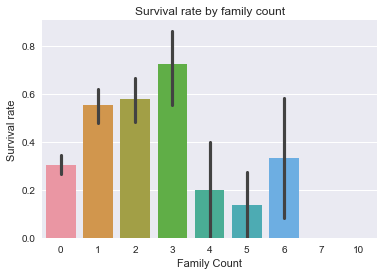

In [63]:
sur_fam = sns.barplot(x='FamilyCount', y='Survived', data=titanic)
sur_fam.set_title('Survival rate by family count')
sur_fam.set_ylabel('Survival rate')
sur_fam.set_xlabel('Family Count')

In [64]:
# As we see from top, family with 3 members helps to increase chances of survival.

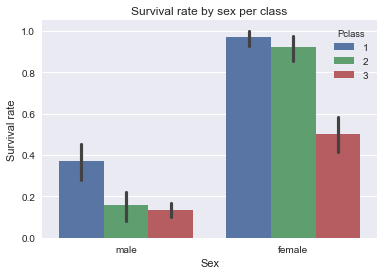

In [65]:
survive_class= sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic)
survive_class.set_title('Survival rate by sex per class')
survive_class.set_ylabel('Survival rate')
survive_class.set_xlabel('Sex')

In [66]:
# female shows higher chances of survival, but third class female survival rate is low as comparing to other two classes.
# male shows low chances of survival, and both second and third class male are less than 20%.

In [67]:
age_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
titanic['age_group'] = pd.cut(titanic["Age"], range(0, 91, 10), right=False, labels=age_label)


In [68]:

titanic.groupby("age_group").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
age_group,,,,,,,,,,,,,,
0-9,62,62,62,62,62,62,62,62,62,62,62,62,62,62
10-19,102,102,102,102,102,102,102,102,102,102,102,102,102,102
20-29,220,220,220,220,220,220,220,220,220,220,220,220,220,220
30-39,167,167,167,167,167,167,167,167,167,167,167,166,167,167
40-49,89,89,89,89,89,89,89,89,89,89,89,89,89,89
50-59,48,48,48,48,48,48,48,48,48,48,48,48,48,48
60-69,19,19,19,19,19,19,19,19,19,19,19,18,19,19
70-79,6,6,6,6,6,6,6,6,6,6,6,6,6,6
80-89,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [69]:
agee = titanic.groupby("age_group").Survived.mean()
agee

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
80-89    1.000000
Name: Survived, dtype: float64

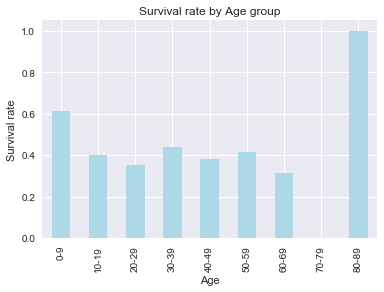

In [70]:
age_graph = agee.plot(kind='bar' , color='lightblue')
age_graph.set_title('Survival rate by Age group')
age_graph.set_ylabel('Survival rate')
age_graph.set_xlabel('Age')

In [71]:
# survival rate of younger children's survival is very high, comparing to other age group.
# only 1 person in 80 and he survived, so it's 100%
# However, rate of senior's survival is low.

In [72]:
titanic.groupby(["Pclass", "age_group"]).Survived.mean()

Pclass  age_group
1       0-9          0.666667
        10-19        0.833333
        20-29        0.705882
        30-39        0.780000
        40-49        0.594595
        50-59        0.555556
        60-69        0.307692
        70-79        0.000000
        80-89        1.000000
2       0-9          1.000000
        10-19        0.500000
        20-29        0.415094
        30-39        0.395833
        40-49        0.555556
        50-59        0.333333
        60-69        0.333333
        70-79        0.000000
3       0-9          0.452381
        10-19        0.257576
        20-29        0.233083
        30-39        0.217391
        40-49        0.058824
        50-59        0.000000
        60-69        0.333333
        70-79        0.000000
Name: Survived, dtype: float64

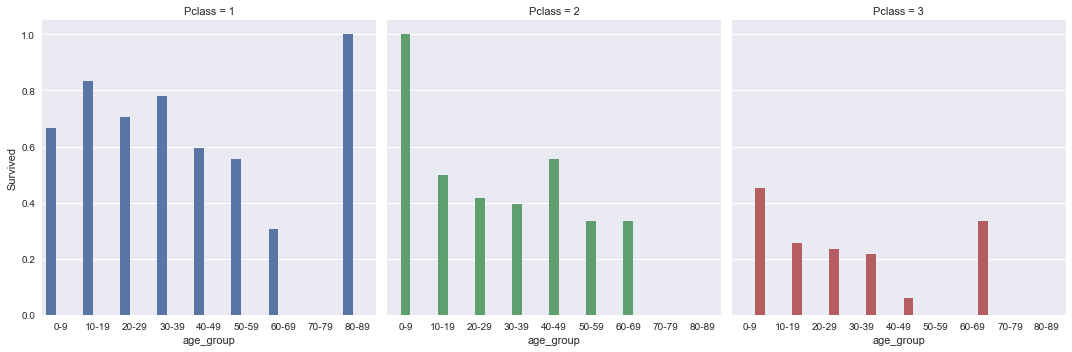

In [74]:
age_group_class = sns.factorplot(x='age_group', y='Survived', hue='Pclass', col = 'Pclass', 
                                 data=titanic, kind='bar', size=5, aspect=1, capsize=0.2, ci=None)

In [75]:
# These graphs show that first class survival rate are over not just overall, but all age groups.